In [1]:
import cv2
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
image=cv2.imread('/home/ishaan/Codes/Datasets/hand_dataset/test_dataset/test_data/images/VOC2007_1.jpg')
print image.shape
print str(image.shape)

(375, 500, 3)
(375, 500, 3)


In [4]:
import scipy.io as sc

In [5]:
buff_1=sc.loadmat('/home/ishaan/Codes/Datasets/hand_dataset/test_dataset/test_data/annotations/VOC2007_1.mat')

In [6]:
print buff_1.keys()

['boxes', '__version__', '__header__', '__globals__']


In [7]:
print buff_1['boxes']

[[array([[(array([[277.17641528, 392.31264669]]), array([[296.94449976, 410.70348234]]), array([[316.85334049, 389.30371276]]), array([[297.08525601, 370.9128771 ]]), array([u'L'], dtype='<U1'), array([], shape=(0, 0), dtype=uint8))]],
      dtype=[('a', 'O'), ('b', 'O'), ('c', 'O'), ('d', 'O'), ('handtype', 'O'), ('truncated', 'O')])
  array([[(array([[172.31843252, 216.90699639]]), array([[166.50836487, 232.88332619]]), array([[189.7926786 , 241.35106813]]), array([[195.60274624, 225.37473832]]), array([u'R'], dtype='<U1'), array([], shape=(0, 0), dtype=uint8))]],
      dtype=[('a', 'O'), ('b', 'O'), ('c', 'O'), ('d', 'O'), ('handtype', 'O'), ('truncated', 'O')])]]


In [8]:
print buff_1['boxes'][0][1][0][0]
row_idx=buff_1['boxes'][0].shape[0]
print row_idx

(array([[172.31843252, 216.90699639]]), array([[166.50836487, 232.88332619]]), array([[189.7926786 , 241.35106813]]), array([[195.60274624, 225.37473832]]), array([u'R'], dtype='<U1'), array([], shape=(0, 0), dtype=uint8))
2


In [9]:
#print buff_1['boxes'][0][i] i->no of hands  buff_1['boxes'][0].shape[0] 
#print buff_1['boxes'][0][0] hand1
#print buff_1['boxes'][0][i][0][0][j][0][k] hand1-x j-hand boundary arrays k-xy coords
print  buff_1['boxes'][0][1][0][0][3][0][1]

225.3747383247405


In [10]:
print buff_1['boxes'][0][1][0][0][3][0]
print buff_1['boxes'][0][0].shape
col=buff_1['boxes'][0][1][0][0].shape
print col

[195.60274624 225.37473832]
(1, 1)
()


In [11]:
x=int(buff_1['boxes'][0][0][0][0][0][0][0])
y=int(buff_1['boxes'][0][0][0][0][0][0][1])
w=int(buff_1['boxes'][0][0][0][0][3][0][0])
h=int(buff_1['boxes'][0][0][0][0][3][0][1])
buff_1_rec=cv2.rectangle(image,(x,y),(w,h),(0,255,0),3)

In [12]:

plt.imshow(image)
print type(buff_1['boxes'])

<type 'numpy.ndarray'>


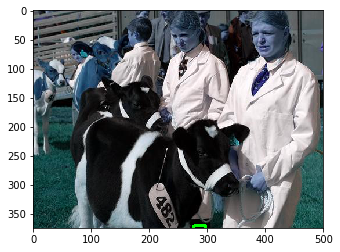

In [13]:
plt.show()
plt.clf()
plt.cla()
plt.close()

In [14]:
plt.gcf().clear()

In [46]:
def _ext_x_y(buff_1):

    #buff_1 is a mat file
  
    tot_no_hd_img=buff_1['boxes'][0].shape[0]  
    #print tot_no_hd_img
     #gives total no of lists within a list in buff_1 .mat file
    hds_info_arr2d=[[0.0 for col in range(4)]for rows in range(tot_no_hd_img)]   
    #initializing 2d array
    
    for cur_hand in range(tot_no_hd_img):
        min_x=1000.0
        min_y=1000.0
        max_x=0.0
        max_y=0.0
        for i in range(4):# i represents total no of elements i a list
            
            idx_val_x=buff_1['boxes'][0][cur_hand][0][0][i][0][0]
            idx_val_y=buff_1['boxes'][0][cur_hand][0][0][i][0][1]
            #print cur_hand," ",i
            # last index[0] represents x coordinate float value
            if(idx_val_x<min_x):
                min_x=idx_val_x
                hds_info_arr2d[cur_hand][0]=min_x
                #print min_x,":min_x"
                #print "arrived0"
            elif(idx_val_x>max_x):
                max_x=idx_val_x
                hds_info_arr2d[cur_hand][1]=max_x
                #print max_x,":max_x"
                #print "arrived1"
            if(idx_val_y<min_y):
                min_y=idx_val_y
                hds_info_arr2d[cur_hand][2]=min_y
                #print min_y,":min_y"
                #print "arrived2"
            elif(idx_val_y>max_y):
                max_y=idx_val_y
                hds_info_arr2d[cur_hand][3]=max_y
                #print max_y,":max_y"
                #print "arrived3"
        #print cur_hand,":cur_hand",min_x,":min_x",max_x,":max_x","\n",min_y,":min_y",max_y,":max_y"
                

    return hds_info_arr2d#this should return a 2D list

2
0 :cur_hand 277.1764152762781 :min_x 316.8533404856758 :max_x 
370.9128771047692 :min_y 410.7034823422354 :max_y
1 :cur_hand 166.50836486970636 :min_x 195.60274624140476 :max_x 
216.90699638925665 :min_y 241.35106812687232 :max_y
[[277.1764152762781, 316.8533404856758, 370.9128771047692, 410.7034823422354], [166.50836486970636, 195.60274624140476, 216.90699638925665, 241.35106812687232]]


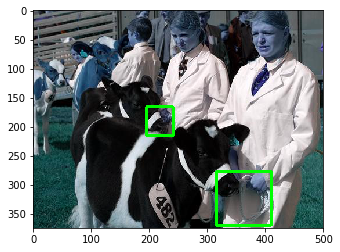

In [38]:
image_mat_file=sc.loadmat('/home/ishaan/Codes/Datasets/hand_dataset/test_dataset/test_data/annotations/VOC2007_1.mat')
#print image_mat_file['boxes']
im=cv2.imread('/home/ishaan/Codes/Datasets/hand_dataset/test_dataset/test_data/images/VOC2007_1.jpg')
x_y=_ext_x_y(image_mat_file) #why is this generating error 
print x_y
cv2.rectangle(im,(int(x_y[0][1]),int(x_y[0][0])),(int(x_y[0][3]),int(x_y[0][2])),(0,255,0),3)
cv2.rectangle(im,(int(x_y[1][1]),int(x_y[1][0])),(int(x_y[1][3]),int(x_y[1][2])),(0,255,0),3)
#cv2.rectangle(im,(int(x_y[2][1]),int(x_y[2][0])),(int(x_y[2][3]),int(x_y[2][2])),(0,255,0),3)
#cv2.rectangle(im,(int(x_y[3][1]),int(x_y[3][0])),(int(x_y[3][3]),int(x_y[3][2])),(0,255,0),3)
#cv2.rectangle(im,(int(x_y[4][1]),int(x_y[4][0])),(int(x_y[4][3]),int(x_y[4][2])),(0,255,0),3)
plt.imshow(im)
plt.show()

In [17]:
print x_y
print str(x_y)

[[203.09435243369379, 232.54617044212327, 275.14854781466994, 298.86112960468483]]
[[203.09435243369379, 232.54617044212327, 275.14854781466994, 298.86112960468483]]


In [18]:

image_rectangle=cv2.rectangle(image,(ext_x_y[0],ext_x_y[1]),(ext_x_y[2],ext_x_y[3]),(255,0,0),3)
image_rectangle2=cv2.rectangle(image,(ext_x_y[4],ext_x_y[5]),(ext_x_y[6],ext_x_y[7]),(255,0,0),3)
plt.imshow(image_rectangle)
plt.show()
plt.clf()
plt.cla()
plt.close()  #still the previous plots are not cleared?

NameError: name 'ext_x_y' is not defined

In [ ]:

lis1=[[0 for col in range(4)]for row in range(5)]
lis2=[2.0,4.1,8.2,9.0]


for i in range(5):
    for j in range(4):
        lis1[i][j]=lis2[j]

#print lis1
lis3=lis1
np_lis1=np.array(lis3,dtype=float)
print np_lis1
print np_lis1.shape[0]
print np_lis1.shape[1]



In [40]:
import os


In [76]:
oxf_hands=open('/home/ishaan/Pictures/oxford-hand-validation-dataset.txt','w')

In [77]:
images_dir_path="/home/ishaan/Codes/Datasets/hand_dataset/validation_dataset/validation_data/images/"
ann_dir_path="/home/ishaan/Codes/Datasets/hand_dataset/validation_dataset/validation_data/annotations/"

In [78]:
def _imageshape(image):
    return image.shape

In [ ]:
name="ishaan.jpg"
name=name.replace(".jpg","")
print name
print len(os.listdir(images_dir_path))
print len(os.listdir(ann_dir_path))

In [79]:
sort_images_dir=sorted(os.listdir(images_dir_path))
sort_anns_dir=sorted(os.listdir(ann_dir_path))
#print sort_images_dir
print sort_anns_dir

['.DS_Store', 'Movie_4weds_1.mat', 'Movie_4weds_10.mat', 'Movie_4weds_100.mat', 'Movie_4weds_101.mat', 'Movie_4weds_102.mat', 'Movie_4weds_103.mat', 'Movie_4weds_104.mat', 'Movie_4weds_105.mat', 'Movie_4weds_106.mat', 'Movie_4weds_107.mat', 'Movie_4weds_108.mat', 'Movie_4weds_109.mat', 'Movie_4weds_11.mat', 'Movie_4weds_110.mat', 'Movie_4weds_111.mat', 'Movie_4weds_112.mat', 'Movie_4weds_113.mat', 'Movie_4weds_114.mat', 'Movie_4weds_115.mat', 'Movie_4weds_116.mat', 'Movie_4weds_117.mat', 'Movie_4weds_118.mat', 'Movie_4weds_119.mat', 'Movie_4weds_12.mat', 'Movie_4weds_120.mat', 'Movie_4weds_121.mat', 'Movie_4weds_122.mat', 'Movie_4weds_123.mat', 'Movie_4weds_124.mat', 'Movie_4weds_125.mat', 'Movie_4weds_126.mat', 'Movie_4weds_127.mat', 'Movie_4weds_128.mat', 'Movie_4weds_129.mat', 'Movie_4weds_13.mat', 'Movie_4weds_130.mat', 'Movie_4weds_131.mat', 'Movie_4weds_132.mat', 'Movie_4weds_133.mat', 'Movie_4weds_134.mat', 'Movie_4weds_135.mat', 'Movie_4weds_136.mat', 'Movie_4weds_137.mat', 'Mo

In [80]:
strings=""
for image_s,ann_s in zip(sort_images_dir,sort_anns_dir):
    cur_img_path=images_dir_path+str(image_s)
    cur_ann_path=ann_dir_path+str(ann_s)
    curr_img_path_shrt="validation_dataset/images/"+str(image_s)
    try:
        image=cv2.imread(cur_img_path)
        ann=sc.loadmat(cur_ann_path)        
        img_cord=_ext_x_y(ann)
        all_hands_info=np.array(img_cord)
        #print all_hands_info.shape
        img_shape=_imageshape(image)
    except Exception as e:
        pass
    else: 
        oxf_hands.write(curr_img_path_shrt+" "+str(img_shape)+"\n")
        #no of hands -rows
        #hands info -cols
        rows_nh=int(all_hands_info.shape[0])
        cols_hi=int(all_hands_info.shape[1])
        
        for i in range(rows_nh):
            for j in range(cols_hi):
                string =str(all_hands_info[i][j])
                strings=strings+string+","
                #oxf_hands.write(str(all_hands_info[i][j])+",")
            strings=strings[:-1]
            oxf_hands.write(strings+";")
            strings=""
        oxf_hands.write("\n")

oxf_hands.close()
    